In [1]:
from astropy.io import ascii
from astropy.table import vstack,Table,Column
import matplotlib.pyplot as plt
import numpy as np
import sncosmo
from numpy.random import uniform, multivariate_normal
from _sncosmo_ported_model import SN91bgSource
import SNcosmo_simulation as sim

In [2]:
model = sncosmo.Model(source=SN91bgSource())
sim.generate_lc(1000,model)

reduced chi^2: 0.836514340970214
sim_z: 0.39223966496266993
sim_stretch: 0.9934920240409547
sim_color: 0.4611478567035335


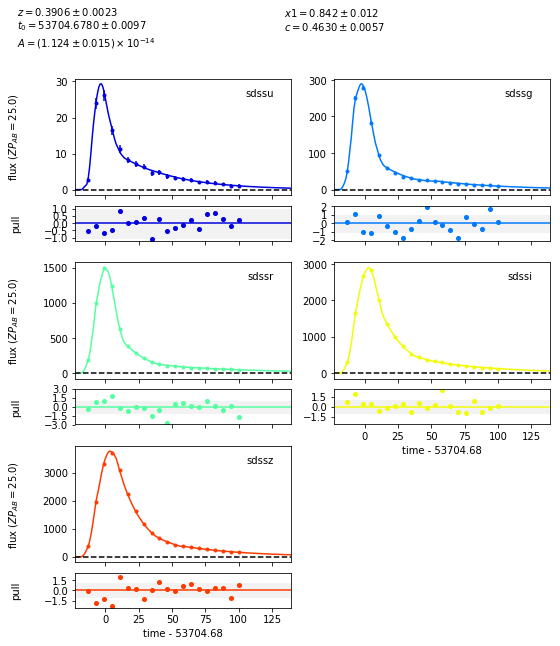

In [27]:
# example of fitting
cid=5
lc = Table.read('sim_lcs/sn91bg_{:05d}.csv'.format(cid))
meta = Table.read('sim_lcs/sn91bg_dump.csv')
for par in ['cid','z','stretch','color']:
    lc.meta[par]=meta[par][cid-1]
model.set(z=lc.meta['z'], stretch=lc.meta['stretch'], color=lc.meta['color'])
result, fitted_model = sncosmo.fit_lc(lc, model,
                                      ['z','t0','amplitude', 'stretch', 'color'],
                                      bounds={'z': (0.01, 0.45),'stretch': (0.65, 1.25),'color': (0, 1)})
sncosmo.plot_lc(lc,model=fitted_model,errors=result.errors)
print('reduced chi^2:',result.chisq/result.ndof)
print('sim_z:', lc.meta['z'])
print('sim_stretch:', lc.meta['stretch'])
print('sim_color:', lc.meta['color'])

reduced chi^2: 0.8254090882424123


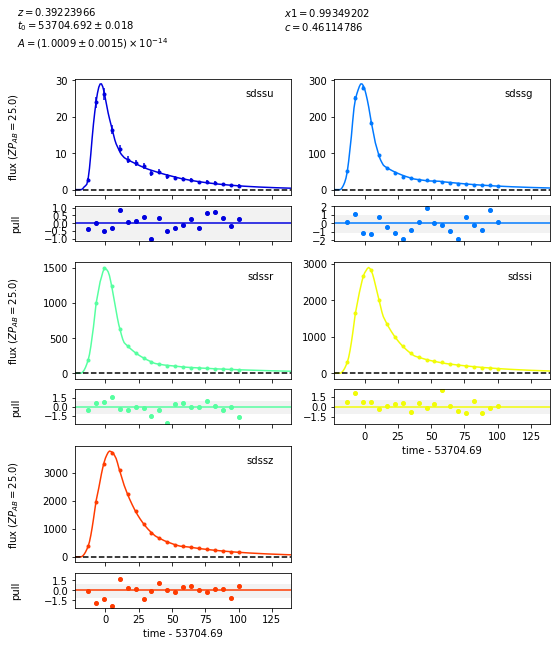

In [28]:
model.set(z=lc.meta['z'], stretch=lc.meta['stretch'], color=lc.meta['color'])
result, fitted_model = sncosmo.fit_lc(lc, model,
                                      ['t0','amplitude'],
                                      bounds=None)
sncosmo.plot_lc(lc,model=fitted_model,errors=result.errors)
print('reduced chi^2:',result.chisq/result.ndof)

Fit all generated light curves

In [7]:
def fit_all(num,mod):
    """
    Run lc-fit for a series of SNe with sn91bg model, output all the fitting results
    
    Args:
        num    (int): how many SN to fit
        mod  (model): which model to use
    """
    model=mod
    lc=range(num)
    sim_x1=[]
    sim_c=[]
    sim_z=[]
    fit_z=[]
    fit_x1=[]
    fit_c=[]
    cid=[]
    for i in lc:
        try:
            meta=Table.read('sim_lcs/sn91bg_dump.csv')
            data=Table.read('sim_lcs/sn91bg_{:05d}.csv'.format(i+1))
            for par in ['cid','z','stretch','color']:
                data.meta[par]=meta[par][i]
            result, fitted_model = sncosmo.fit_lc(data, model,
                                      ['z','t0','amplitude', 'stretch', 'color'],
                                      bounds={'z': (0.01, 0.45),'stretch': (0.65, 1.25),'color': (0, 1)})
            sim_x1.append(data.meta['stretch'])
            sim_c.append(data.meta['color'])
            sim_z.append(data.meta['z'])
            fit_x1.append(round(result.parameters[3],6))
            fit_c.append(round(result.parameters[4],6))
            fit_z.append(round(result.parameters[0],6))
            cid.append(data.meta['cid'])
        except:
            continue
    result=Table([cid, sim_z, fit_z, sim_x1, fit_x1, sim_c, fit_c], \
                       names=['cid','sim_z','fit_z','sim_x1','fit_x1','sim_c','fit_c'])
    result.write('sn91bg_all_fit.csv',overwrite=True)


In [8]:
model=sncosmo.Model(source=SN91bgSource())
fit_all(1000,model)

In [9]:
data=Table.read('sn91bg_all_fit.csv')

Comparison of fit and simulate parameters

(0.0, 0.4)

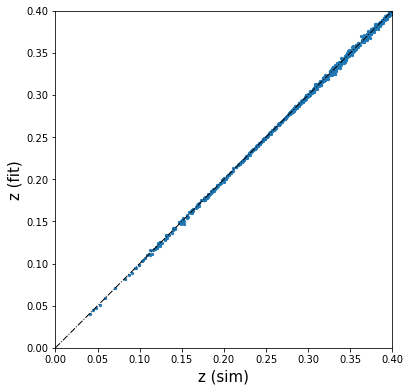

In [12]:
fig=plt.figure(figsize=(6,6))
ax=fig.add_axes((0,0,0.78,0.78))
#ax1=fig.add_axes((0,0.8,0.78,0.2))
#ax2=fig.add_axes((0.8,0,0.2,0.78))
ax.scatter(data['sim_z'],data['fit_z'],s=5)
#ax1.hist(data['sim_z'])
#ax2.hist(data['fit_z'],orientation='horizontal')
#ax1.set_xticklabels([])
#ax2.set_yticklabels([])
ax.set_xlabel('z (sim)',fontsize=15,fontweight='light')
ax.set_ylabel('z (fit)',fontsize=15,fontweight='light')
ax.plot(np.arange(0,0.41,0.1),np.arange(0,0.41,0.1),'k-.',linewidth=1)
ax.set_xlim(0.,.4)
ax.set_ylim(0.,.4)

(-0.1, 1.1)

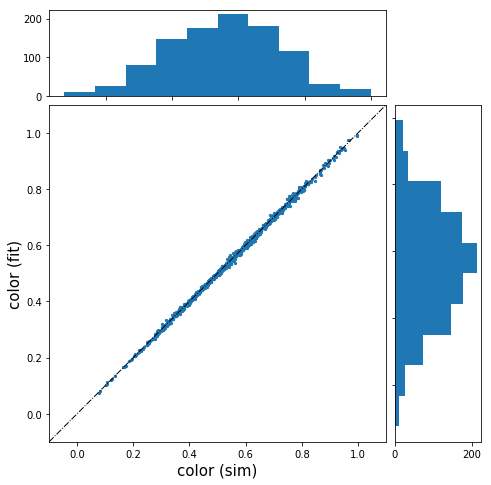

In [13]:
fig=plt.figure(figsize=(6,6))
ax=fig.add_axes((0,0,0.78,0.78))
ax1=fig.add_axes((0,0.8,0.78,0.2))
ax2=fig.add_axes((0.8,0,0.2,0.78))
ax.scatter(data['sim_c'],data['fit_c'],s=5)
ax1.hist(data['sim_c'])
ax2.hist(data['fit_c'],orientation='horizontal')
ax1.set_xticklabels([])
ax2.set_yticklabels([])
ax.set_xlabel('color (sim)',fontsize=15,fontweight='light')
ax.set_ylabel('color (fit)',fontsize=15,fontweight='light')
ax.plot(np.arange(-0.1,1.2,0.1),np.arange(-0.1,1.2,0.1),'k-.',linewidth=1)
ax.set_xlim(-0.1,1.1)
ax.set_ylim(-0.1,1.1)

(0.6, 1.3)

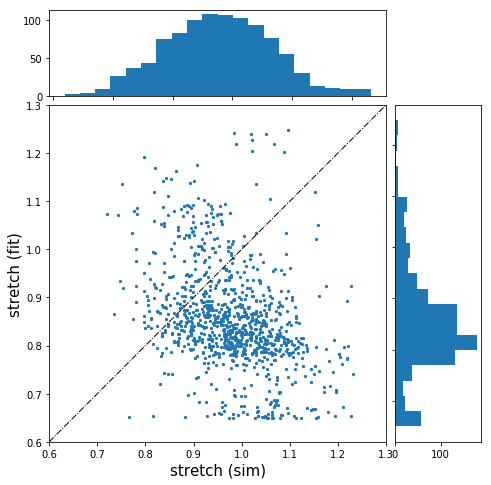

In [14]:
fig=plt.figure(figsize=(6,6))
ax=fig.add_axes((0,0,0.78,0.78))
ax1=fig.add_axes((0,0.8,0.78,0.2))
ax2=fig.add_axes((0.8,0,0.2,0.78))
ax.scatter(data['sim_x1'],data['fit_x1'],s=5)
ax1.hist(data['sim_x1'],bins=20)
ax2.hist(data['fit_x1'],bins=20,orientation='horizontal')
ax1.set_xticklabels([])
ax2.set_yticklabels([])
ax.set_xlabel('stretch (sim)',fontsize=15,fontweight='light')
ax.set_ylabel('stretch (fit)',fontsize=15,fontweight='light')
ax.plot(np.arange(0.6,1.4,0.1),np.arange(0.6,1.4,0.1),'k-.',linewidth=1)
ax.set_xlim(0.6,1.3)
ax.set_ylim(0.6,1.3)